In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/SALAKO/dlib/omdena-texas-homelessness/src/tasks/task-3-model/IncomePovertyStats_Texas.csv")
df.head()

,Number,County,Per Capita Income,Total Personal Income,Median Household Income,Average Annual Pay,% of Population in Poverty,% of Population Under 18 in Poverty
0,213,Starr,37218,1.791172e+09,32516,31251,32.5,43.2
1,244,Willacy,30731,5.891470e+08,35821,37959,30.5,38.1
2,252,Zapata,27415,4.102890e+08,36069,52913,30.1,43.7
3,253,Zavala,23569,3.644210e+08,32538,39689,29.6,40.4
4,23,Brooks,61287,2.593090e+08,31410,43244,29.6,44.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Number                               254 non-null    int64  
 1   County                               254 non-null    object 
 2   Per Capita Income                    254 non-null    int64  
 3   Total Personal Income                254 non-null    float64
 4   Median Household Income              254 non-null    int64  
 5   Average Annual Pay                   254 non-null    int64  
 6   % of Population in Poverty           254 non-null    float64
 7   % of Population Under 18 in Poverty  254 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 16.0+ KB


In [5]:
df.describe()

,Number,Per Capita Income,Total Personal Income,Median Household Income,Average Annual Pay,% of Population in Poverty,% of Population Under 18 in Poverty
count,254.00000,254.000000,2.540000e+02,254.000000,254.000000,254.000000,254.000000
mean,126.50000,46478.921260,6.027667e+09,54958.177165,46160.925197,15.456299,22.242913
std,73.46768,12719.554346,2.404065e+10,13348.131715,10428.148095,5.036933,7.512878
min,0.00000,23569.000000,9.081000e+06,31410.000000,27058.000000,4.800000,6.500000
25%,63.25000,39609.000000,3.109718e+08,45775.250000,39325.000000,11.950000,17.400000
50%,126.50000,44302.000000,8.423690e+08,52703.000000,43509.500000,14.850000,22.050000
75%,189.75000,50715.250000,2.169747e+09,61343.500000,50284.000000,18.325000,26.600000
max,253.00000,130983.000000,2.830000e+11,105763.000000,85618.000000,32.500000,44.400000


In [62]:
df.columns

Index(['Number', 'County', 'Per Capita Income', 'Total Personal Income',
       'Median Household Income', 'Average Annual Pay',
       '% of Population in Poverty', '% of Population Under 18 in Poverty'],
      dtype='object')

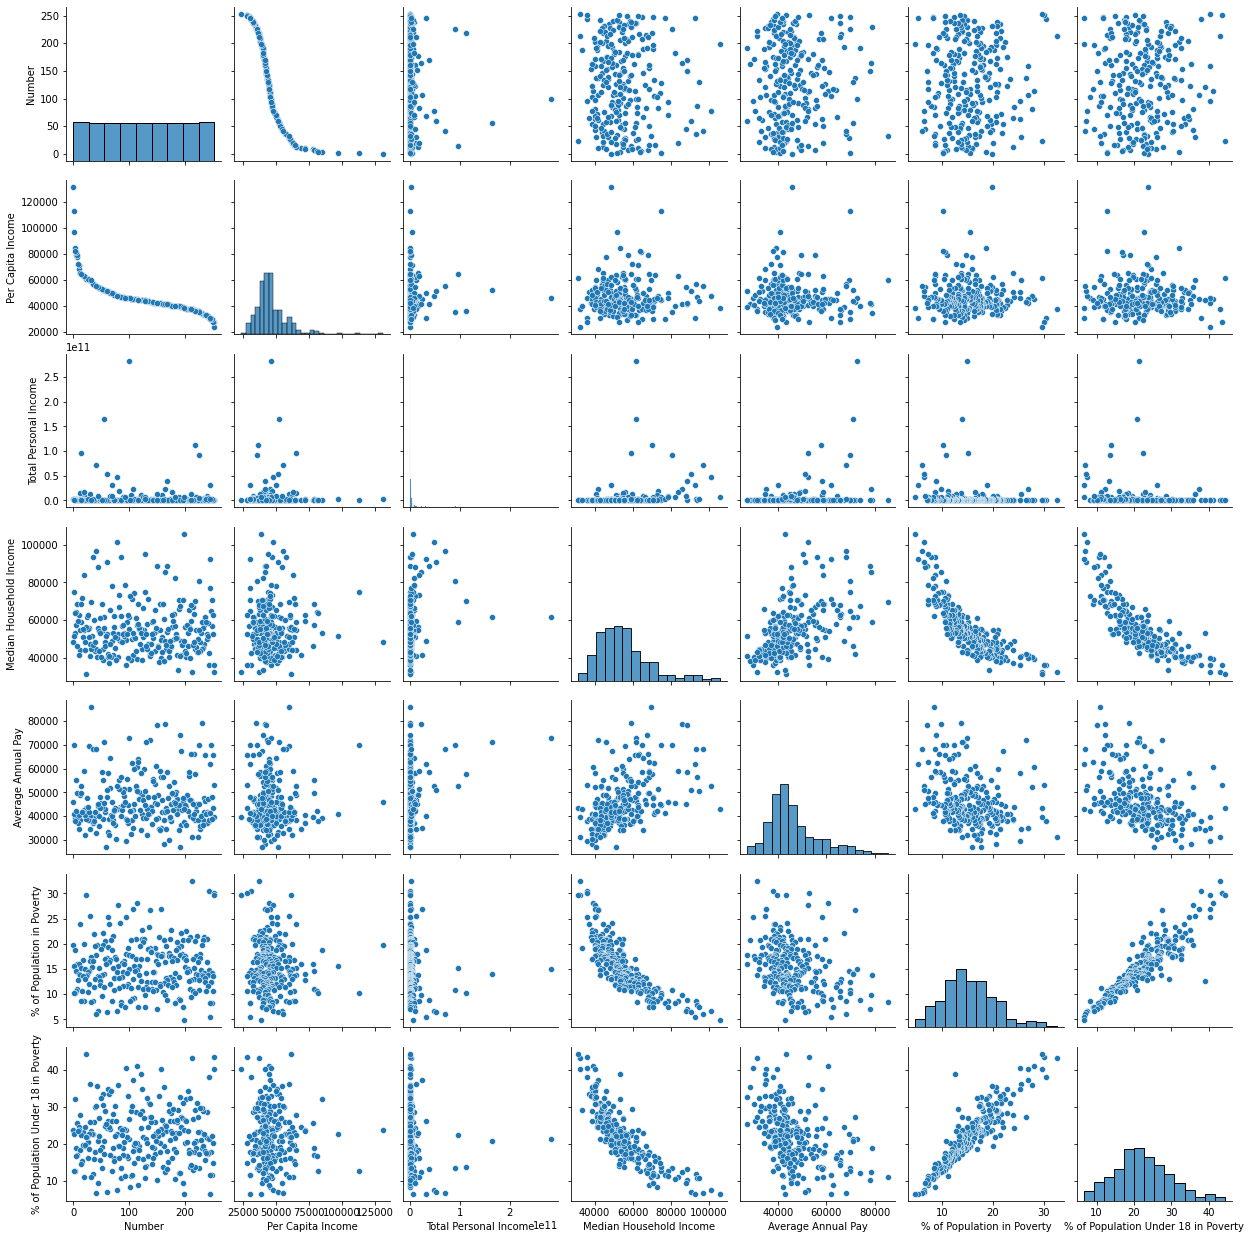

In [7]:
sns.pairplot(df)

C:\Users\SALAKO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='% of Population in Poverty', ylabel='Density'>

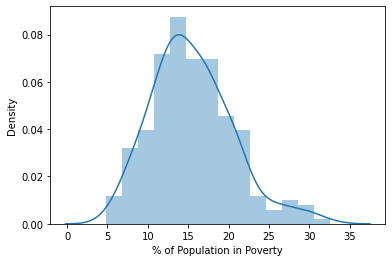

In [11]:
sns.distplot(df["% of Population in Poverty"])

<AxesSubplot:>

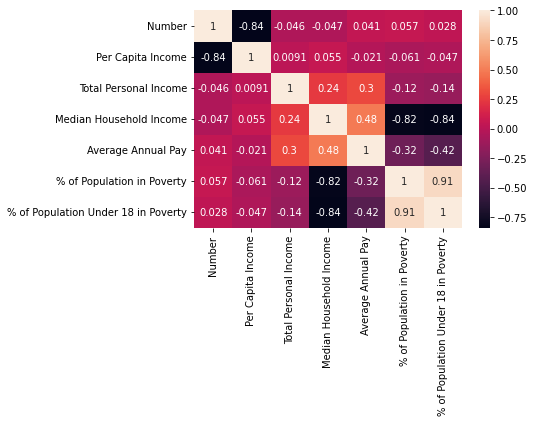

In [12]:
sns.heatmap(df.corr(), annot = True)

In [13]:
df.columns

Index(['Number', 'County', 'Per Capita Income', 'Total Personal Income',
       'Median Household Income', 'Average Annual Pay',
       '% of Population in Poverty', '% of Population Under 18 in Poverty'],
      dtype='object')

In [36]:
X = df[['Per Capita Income', 'Total Personal Income',
       'Median Household Income', 'Average Annual Pay',
       '% of Population Under 18 in Poverty']]

In [37]:
X = df.drop(["County", "Number", "% of Population in Poverty"], axis = 1)

In [38]:
y = df["% of Population in Poverty"]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
print(lm.intercept_)

7.722876273724714


In [45]:
lm.coef_

array([-3.90007615e-06, -6.32130932e-13, -1.05839686e-04,  6.29225487e-05,
        4.83512291e-01])

In [46]:
X_train.columns

Index(['Per Capita Income', 'Total Personal Income', 'Median Household Income',
       'Average Annual Pay', '% of Population Under 18 in Poverty'],
      dtype='object')

In [47]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ["Coeff"])

In [48]:
cdf

,Coeff
Per Capita Income,-3.900076e-06
Total Personal Income,-6.321309e-13
Median Household Income,-1.058397e-04
Average Annual Pay,6.292255e-05
% of Population Under 18 in Poverty,4.835123e-01


In [49]:
predictions = lm.predict(X_test)

In [50]:
predictions

array([13.35288382, 13.83407657, 19.54542326, 10.5482816 , 15.90507505,
       14.51674162, 20.89971988, 12.94304683, 13.65825189, 13.23196898,
       12.86126072, 13.96699754, 19.20492384, 13.33622921, 16.2582626 ,
       15.41492484, 16.82582895, 18.63786678,  2.22126748, 13.79431393,
       28.34823228,  8.04101277, 20.15453498, 10.65257066, 11.13841366,
       11.31986597, 15.25527908, 17.34005482, 12.03375886, 15.92466513,
       15.39871617, 15.10402414, 13.72787113, 16.11890642, 15.37537737,
       16.24549671, 20.46994884, 12.65973976, 12.91239732,  7.6713728 ,
       22.47289259, 14.1359649 , 22.23794644, 23.74364553, 18.10403631,
       17.52748592, 15.37075053, 17.86243365, 18.12202857, 21.97542575,
       14.99054302, 21.54193173, 15.23224286,  9.58993292, 12.20971659,
       19.01358759,  8.75713519, 12.95730492, 10.05691522, 10.50568786,
       20.61055783, 12.97045964,  9.09266822,  5.95045867, 17.53800566,
       16.03120753, 14.82438609, 17.84354656, 18.79661659, 12.83

In [51]:
y_test

167    13.1
160    13.4
69     17.9
219    10.5
93     16.8
       ... 
98     16.5
68     17.9
79     17.5
1      30.5
43     20.0
Name: % of Population in Poverty, Length: 102, dtype: float64

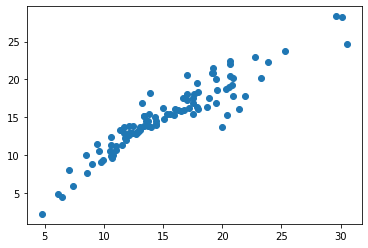

In [52]:
plt.scatter(y_test, predictions)

C:\Users\SALAKO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='% of Population in Poverty', ylabel='Density'>

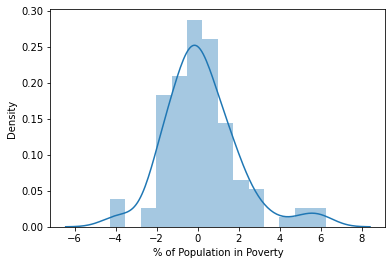

In [53]:
sns.distplot((y_test-predictions))

In [54]:
from sklearn import metrics

In [55]:
metrics.mean_absolute_error(y_test, predictions)

1.3069957131077126

In [56]:
metrics.mean_squared_error(y_test,predictions)

3.3093824304438058

In [57]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

1.8191708084849552

In [63]:
lm.fit(X_train,y_train)

LinearRegression()

In [64]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-3.90007615e-06 -6.32130932e-13 -1.05839686e-04  6.29225487e-05
  4.83512291e-01]


In [65]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

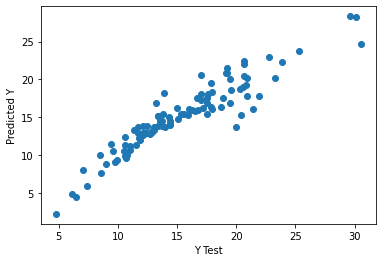

In [66]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [67]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.3069957131077126
MSE: 3.3093824304438058
RMSE: 1.8191708084849552


In [68]:
metrics.explained_variance_score(y_test, predictions)

0.8685779919291332

C:\Users\SALAKO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


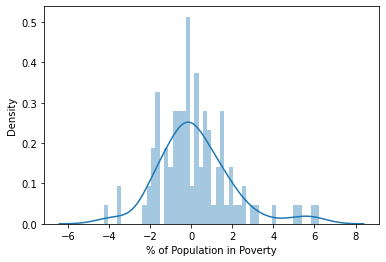

In [69]:
sns.distplot((y_test-predictions),bins=50);

In [70]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Per Capita Income,-3.900076e-06
Total Personal Income,-6.321309e-13
Median Household Income,-1.058397e-04
Average Annual Pay,6.292255e-05
% of Population Under 18 in Poverty,4.835123e-01


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Per Capita Income** is associated with a **decrease of 3.900076e-06 % of Population in Poverty**.
- Holding all other features fixed, a 1 unit increase in **Total Personal Income** is associated with a **decrease of 6.321309e-13 % of Population in Poverty**.
- Holding all other features fixed, a 1 unit increase in **Median Household Income** is associated with a **decrease of 1.058397e-04 % of Population in Poverty**.
- Holding all other features fixed, a 1 unit increase in **Average Annual Pay** is associated with an **Increase of 6.292255e-05 % of Population in Poverty**.
- Holding all other features fixed, a 1 unit increase in **% of Population Under 18 in Poverty** is associated with an **Increase of 4.835123e-01 % of Population in Poverty**.

# K Means Clustering

It is **very important to remember that we have labels for this dataset, but we will not use them for the "K Means clustering" algorithm because it is an unsupervised learning algorithm**.

When using the "K Means" algorithm under normal circumstances, this is because you don't have labels. In this case, we'll use labels to try to get an idea of how well the algorithm is performing, but you won't usually do this for "K means".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
df.head()

,Number,County,Per Capita Income,Total Personal Income,Median Household Income,Average Annual Pay,% of Population in Poverty,% of Population Under 18 in Poverty
0,213,Starr,37218,1.791172e+09,32516,31251,32.5,43.2
1,244,Willacy,30731,5.891470e+08,35821,37959,30.5,38.1
2,252,Zapata,27415,4.102890e+08,36069,52913,30.1,43.7
3,253,Zavala,23569,3.644210e+08,32538,39689,29.6,40.4
4,23,Brooks,61287,2.593090e+08,31410,43244,29.6,44.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Number                               254 non-null    int64  
 1   County                               254 non-null    object 
 2   Per Capita Income                    254 non-null    int64  
 3   Total Personal Income                254 non-null    float64
 4   Median Household Income              254 non-null    int64  
 5   Average Annual Pay                   254 non-null    int64  
 6   % of Population in Poverty           254 non-null    float64
 7   % of Population Under 18 in Poverty  254 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 16.0+ KB


In [9]:
df.describe()

,Number,Per Capita Income,Total Personal Income,Median Household Income,Average Annual Pay,% of Population in Poverty,% of Population Under 18 in Poverty
count,254.00000,254.000000,2.540000e+02,254.000000,254.000000,254.000000,254.000000
mean,126.50000,46478.921260,6.027667e+09,54958.177165,46160.925197,15.456299,22.242913
std,73.46768,12719.554346,2.404065e+10,13348.131715,10428.148095,5.036933,7.512878
min,0.00000,23569.000000,9.081000e+06,31410.000000,27058.000000,4.800000,6.500000
25%,63.25000,39609.000000,3.109718e+08,45775.250000,39325.000000,11.950000,17.400000
50%,126.50000,44302.000000,8.423690e+08,52703.000000,43509.500000,14.850000,22.050000
75%,189.75000,50715.250000,2.169747e+09,61343.500000,50284.000000,18.325000,26.600000
max,253.00000,130983.000000,2.830000e+11,105763.000000,85618.000000,32.500000,44.400000


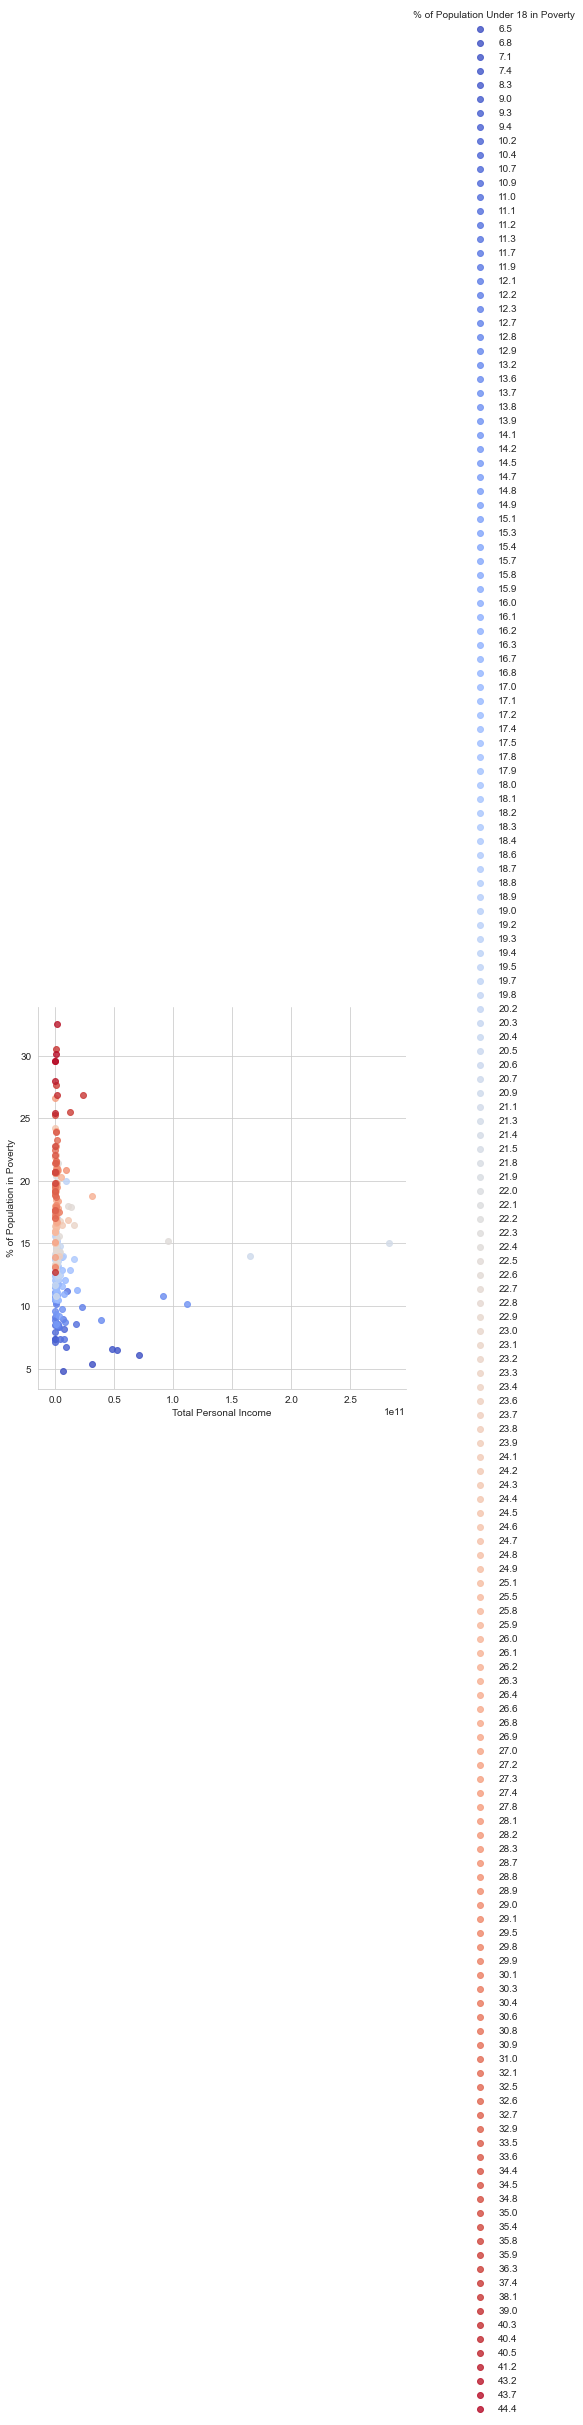

In [14]:
sns.set_style('whitegrid')
sns.lmplot('Total Personal Income','% of Population in Poverty',data=df, hue='% of Population Under 18 in Poverty',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=2)

In [19]:
kmeans.fit(df.drop('County',axis=1))

KMeans(n_clusters=2)

In [20]:
kmeans.cluster_centers_

array([[1.26570281e+02, 4.64736145e+04, 3.14818437e+09, 5.47235181e+04,
        4.57869357e+04, 1.55048193e+01, 2.23196787e+01],
       [1.23000000e+02, 4.67432000e+04, 1.49425883e+11, 6.66442000e+04,
        6.47856000e+04, 1.30400000e+01, 1.84200000e+01]])

In [21]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [30]:
df['Cluster'] = df['Per Capita Income'].apply(converter)

In [31]:
df.head()

,Number,County,Per Capita Income,Total Personal Income,Median Household Income,Average Annual Pay,% of Population in Poverty,% of Population Under 18 in Poverty,Cluster
0,213,Starr,37218,1.791172e+09,32516,31251,32.5,43.2,0
1,244,Willacy,30731,5.891470e+08,35821,37959,30.5,38.1,0
2,252,Zapata,27415,4.102890e+08,36069,52913,30.1,43.7,0
3,253,Zavala,23569,3.644210e+08,32538,39689,29.6,40.4,0
4,23,Brooks,61287,2.593090e+08,31410,43244,29.6,44.4,0


In [32]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[249   5]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       254
           1       0.00      0.00      0.00         0

    accuracy                           0.98       254
   macro avg       0.50      0.49      0.50       254
weighted avg       1.00      0.98      0.99       254

